In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_gender = pd.read_csv('/Users/Oh/Documents/CodeAcademyBerlin/titanic_EDA/datasets/gender_submission.csv')
df_test = pd.read_csv('/Users/Oh/Documents/CodeAcademyBerlin/titanic_EDA/datasets/test.csv')
df_train = pd.read_csv('/Users/Oh/Documents/CodeAcademyBerlin/titanic_EDA/datasets/train.csv')


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check for missing values per column
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

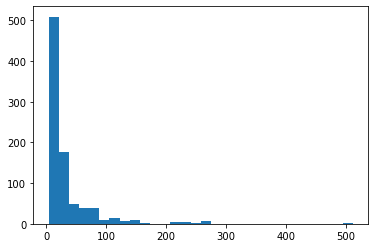

In [6]:
# Filter out rows where Fare == 0
# Select 'Fare' column and plot histogram

fares = df_train [df_train['Fare'] != 0] ['Fare']

fig, ax = plt.subplots()
ax.hist(fares, bins = 30)
plt.show()

In [7]:
# Summary stats on ticket fare for each passenger class. 

"""
You haven't dealt with the missing values yet. Separate them out, then fill with median value.
"""

df_train.groupby('Pclass').agg({'Fare':['mean', 'min','max', 'median']})



Fare                        
             mean  min       max   median
Pclass                                   
1       84.154687  0.0  512.3292  60.2875
2       20.662183  0.0   73.5000  14.2500
3       13.675550  0.0   69.5500   8.0500

In [8]:
# Count number of rows where ticket fare = 0 (corrupt data)
df_train[df_train['Fare']==0].count()   

PassengerId    15
Survived       15
Pclass         15
Name           15
Sex            15
Age             7
SibSp          15
Parch          15
Ticket         15
Fare           15
Cabin           3
Embarked       15
dtype: int64

In [9]:
# Sort passengers into age categories based on age. 
#        age < 18:   'Child'
#  18 =< age < 65:  'Adult'
#  65 =< age:       'Senior'
#  If the age is missing (NaN), sort into category 'Unknown'.

"""
Using a lambda function would make the line too long. 
So I define a new function "sort_age". 
Function "sort_age" was written and tested in following cell, then pasted into this one.
"""

def sort_age(age):
    if np.isnan(age):           # If age is missing (i.e. is NaN)
        return 'Unknown'
    elif age <18:
        return 'Child'
    elif age >= 18 and age < 65:
        return 'Adult'
    else:
        return 'Senior'
        

# Create new column "Age_Category"
df_train['Age_Category'] = df_train['Age'].map(sort_age)    # Plug in "sort_age()" function into map method. 
df_train.head(20)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Unknown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


In [10]:
# Create function for sorting ages

# Test list
age_list = [12, 18, 40, 65, 66, np.nan]

# Define function
def sort_age(age):
    if np.isnan(age):           # If age is missing (i.e. is NaN)
        return 'Unknown'
    elif age <18:
        return 'Child'
    elif age >= 18 and age < 65:
        return 'Adult'
    else:
        return 'Senior'

categories = map(sort_age, age_list)    # Create iterator (map object)
for cat in categories:                  # Print each element
    print (cat)

Child
Adult
Adult
Senior
Senior
Unknown


In [11]:
# Count number of survivors per Age_Category
df_train.groupby('Age_Category').agg({'Survived':'sum'})



,Survived
Age_Category,
Adult,228
Child,61
Senior,1
Unknown,52


In [12]:
# Group by age category and survival, and count passengers.

df_train.groupby(['Age_Category', 'Survived']).agg(Passenger_Count = ('PassengerId','count'))




Passenger_Count
Age_Category Survived                 
Adult        0                     362
             1                     228
Child        0                      52
             1                      61
Senior       0                      10
             1                       1
Unknown      0                     125
             1                      52

In [13]:
# Count total passengers who survived vs didn't survive

df_train.groupby('Survived').agg(Passenger_counts = ('PassengerId','count'))

,Passenger_counts
Survived,
0,549
1,342


In [29]:
"""
Use display to see all lines
"""

display(df_train)
display(df_train.shape)
display(df_train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adult,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Unknown,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult,0


(891, 14)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


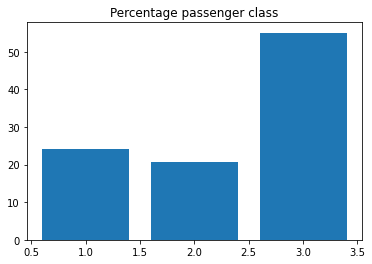

In [14]:
# See breakdown of passenger class

s = df_train['Pclass'].value_counts(normalize = True)

df = pd.DataFrame(s).reset_index()
df.columns = ['Passenger Class', 'Percent']
df.sort_values(by = 'Passenger Class')
df['Percent'] = df['Percent'].apply(lambda x: round (x*100,2))



plt.bar(df['Passenger Class'], df['Percent'])
plt.title('Percentage passenger class')
plt.show()

<AxesSubplot:xlabel='Passenger Class'>

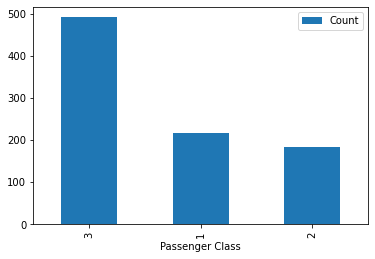

In [15]:
# See breakdown of passenger class

s = df_train['Pclass'].value_counts()

df = pd.DataFrame(s).reset_index()
df.columns = ['Passenger Class', 'Count']
df.sort_values(by = 'Passenger Class')
df.plot(kind='bar', x = 'Passenger Class', y = 'Count')




<AxesSubplot:xlabel='Pclass'>

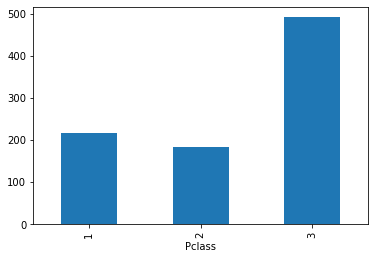

In [16]:
# Look at number of passengers in each passenger class

# Groupby 'Pclass' –> These are the categories on x-axis
# Then select 'PassengerId' as the parameter to count
# nunique() gives the number of unique 'PassengerId's per 'Pclass'
df_train.groupby('Pclass')['PassengerId'].nunique().plot(kind='bar')

In [17]:
# Select rows where the passenger had a cabin. 
# Then see what ticket class they had.

with_cabin = df_train [~df_train['Cabin'].isna()]   # Select rows where 'Cabin' value is NOT a NaN. 
with_cabin['Pclass'].value_counts(normalize=True)   # Count the values of the 'Pclass' column.

# OK, so majority of passengers with a cabin had a first-class ticket.

1    0.862745
2    0.078431
3    0.058824
Name: Pclass, dtype: float64

<AxesSubplot:xlabel='Pclass'>

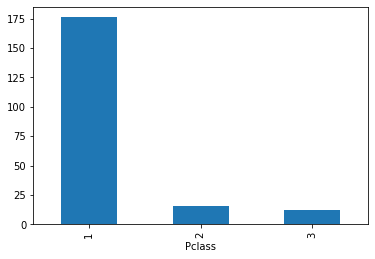

In [18]:
# Select passengers with a cabin
# Plot number of unique 'PassengerId' per 'Pclass'
df_train [~df_train['Cabin'].isna()].groupby('Pclass')['PassengerId'].nunique().plot(kind = 'bar')

# Vast majority of those with a cabin were in first class

In [19]:
"""
RETURN TO AND FIGURE OUT!!!

Trying to create a series with index and column names. 
"""

cabin_vs_pclass = with_cabin [['PassengerId', 'Pclass']]

s = with_cabin['Pclass'].value_counts(normalize=True)       # Create series

s.index.name = 'Passenger Class'        # OK so index name I can set.
s



Passenger Class
1    0.862745
2    0.078431
3    0.058824
Name: Pclass, dtype: float64

In [20]:
# Create new column 'Died' in dataframe
# If survived == 0, died == 1.

df_train['Died'] = df_train['Survived'].map(lambda x: 1 if x ==0 else 0)
df_train.head()







,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


<AxesSubplot:xlabel='Survived'>

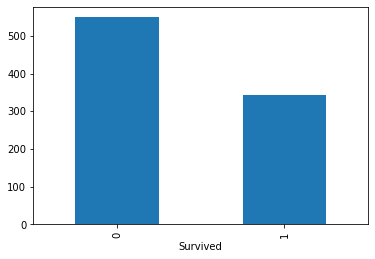

In [21]:
df_train.groupby(['Survived'])['PassengerId'].nunique().plot(kind = 'bar')

In [22]:
# Select rows where 'Age' is missing and save as new DF (df_age_missing)
# Might try to do some inference work based on SibSp and Parch

df_age_missing = df_train[df_train.Age.isna()]



In [23]:
# df for passengers with age missing. 
# See survival rate by passenger class.

df_age_missing.groupby('Pclass').agg(Survival_Percentage = ('Survived',lambda x: round (x.mean()*100,2)))

,Survival_Percentage
Pclass,
1,46.67
2,36.36
3,25.00


In [24]:
# We want to look at the passengers (with missing age) 
# who had a sibling or parent on board (SibSp >0 or Parch > 0)

"""
Ask Killian: 
Is it possible to do a condition like: 
"string1" in df['column name']

Idea is to select rows that contain a particular surname in the 'Name' column.
"""

boolean_not_alone = (df_age_missing['SibSp']>0) | (df_age_missing['Parch']>0)

# Select only relevant columns

df_age_missing = df_age_missing [['Name','Sex', 'Age', 'SibSp', 'Parch']]
df_age_missing[boolean_not_alone].sort_values(by = 'Name')

df_age_missing_not_alone = df_age_missing[boolean_not_alone].sort_values(by = 'Name')
df_age_missing_not_alone

list_surnames = []

for name in df_age_missing_not_alone ['Name']:
    surname = name.split(',')[0]
    if surname not in list_surnames:
        list_surnames.append(surname)

print(list_surnames)


list_surnames_2 = []        # List of names we'll want to further investigate

# for name in list_surnames:
#     for index in range(df_age_missing_not_alone.shape[0]):
#         if name in df_age_missing_not_alone.iloc[index]['Name']:
            
#df_age_missing_not_alone ['Boulos' in df_age_missing_not_alone['Name']]







['Boulos', 'Bourke', 'Caram', 'Chibnall', 'Davison', 'Frauenthal', 'Goldenberg', 'Hagland', 'Johnston', 'Kenyon', 'Kiernan', 'Lefebre', 'Lennon', 'McCoy', 'Meyer', 'Moran', 'Moubarek', 'Murphy', "O'Brien", 'Peter', 'Sage', 'Samaan', 'Spencer', 'Taylor', 'Thorneycroft', 'Zabour']


In [25]:
df_age_missing[boolean_not_alone].shape     # 44 columns

(44, 5)

In [26]:

"""
For each subgroup of sex + age category + class, see percentage of that subgroup that survived
"""
df_sex = df_train.groupby('Sex').agg({'Survived': lambda x: x.mean() * 100})
df_sex_pclass = df_train.groupby(['Sex', 'Pclass']).agg({'Survived': lambda x: x.mean() * 100})
df_sex_pclass_agecat = df_train.groupby(['Sex','Pclass', 'Age_Category']).agg({'Survived': lambda x: x.mean()*100})

df_sex_pclass

# df_sex_pclass.plot(kind='bar')
# df_sex_pclass_agecat.plot(kind = 'bar')

# print (df_sex.head())
# print (df_sex_pclass.head())
# print (df_sex_pclass_agecat.head())




Survived
Sex    Pclass           
female 1       96.808511
       2       92.105263
       3       50.000000
male   1       36.885246
       2       15.740741
       3       13.544669

In [27]:
# For each subgroup with features "Sex", "Age_Category", "Pclass", see what percentage of that subgroup survived.




df_sex = df_train.groupby('Sex').agg(Survived = ('Survived', 'sum'), Died = ('Died', 'sum'), Survival_Percentage = ('Survived', lambda x: x.mean() * 100))
df_sex_pclass = df_train.groupby(['Sex', 'Pclass']).agg(Survived = ('Survived', 'sum'), Died = ('Died', 'sum'), Survival_Percentage = ('Survived', lambda x: x.mean() * 100))
df_sex_pclass_agecat = df_train.groupby(['Sex', 'Pclass', 'Age_Category']).agg(Survived = ('Survived', 'sum'), Died = ('Died', 'sum'), Survival_Percentage = ('Survived', lambda x: x.mean() * 100))


print (df_sex)
print (df_sex_pclass)
print (df_sex_pclass_agecat)

        Survived  Died  Survival_Percentage
Sex                                        
female       233    81            74.203822
male         109   468            18.890815
               Survived  Died  Survival_Percentage
Sex    Pclass                                     
female 1             91     3            96.808511
       2             70     6            92.105263
       3             72    72            50.000000
male   1             45    77            36.885246
       2             17    91            15.740741
       3             47   300            13.544669
                            Survived  Died  Survival_Percentage
Sex    Pclass Age_Category                                     
female 1      Adult               75     2            97.402597
              Child                7     1            87.500000
              Unknown              9     0           100.000000
       2      Adult               56     6            90.322581
              Child             